# Week_2
---

### Import Librarys and Set Plot 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from func import *
%matplotlib inline

---
### Search for interested big data information

In [2]:
data = pd.read_csv('../../NTU_大數據與商業分析Datasets/Orders.csv', nrows = 3).T
data

,0,1,2
DateId,20150703,20150703,20150703
MemberId,1388133,1388133,1388133
OrderGroupCode,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...
TrackSourceTypeDef,Web,Web,Web
TrackDeviceTypeDef,Mobile,Mobile,Mobile
PayProfileTypeDef,SevenEleven,SevenEleven,SevenEleven
SalesOrderSlaveId,4457777,4457778,4457779
SalePageId,1242871,1242880,1242880
IsMajor,True,True,True
IsGift,False,False,False


---
### Import interested Values

In [3]:
data = pd.read_csv('../../NTU_大數據與商業分析Datasets/Orders.csv', index_col = False, #low_memory=False,
                   usecols = ['SalesOrderSlaveDateTime', 'SalesOrderSlaveTotalPayment', 'City'])\
                [['SalesOrderSlaveDateTime', 'SalesOrderSlaveTotalPayment', 'City']]
data.columns = ['Date', 'Payment', 'City']
data.head()

,Date,Payment,City
0,2015-07-03 07:30:02.007,350.0,嘉義縣
1,2015-07-03 07:30:02.023,199.0,嘉義縣
2,2015-07-03 07:30:02.040,199.0,嘉義縣
3,2015-07-03 07:30:02.057,225.0,嘉義縣
4,2015-07-03 07:33:01.600,100.0,桃園市


---
### Look for Unwanted Values

In [4]:
data.loc[:,'City'].unique()

array(['嘉義縣', '桃園市', '台南市', '新北市', '新竹市', '台北市', '苗栗縣', '台中市', '高雄市',
       '彰化縣', '屏東縣', '新竹縣', '宜蘭縣', '花蓮縣', '雲林縣', '台東縣', '基隆市', '南投縣',
       '嘉義市', '台東市', '澎湖縣', '屏東市', 'New', '<fo', 'Kao', 'Kot', 'Tao',
       'Hy ', nan, '25 ', 'Keb', '1st', 'Tai', 'Ins', '桃園縣', 'Đại', 'Cha',
       'Xin', 'Quậ', 'Nan', 'No.', 'Hsi', 'Daf', 'Aya', 'Jia'],
      dtype=object)

---
### Remove Unwanted Values (\u4e00 ~ \u9fff : Chinese ASCII)

In [5]:
data = data[('\u4e00' <= data['City'].str[0]) & (data['City'].str[0] <= '\u9fff')]
data.loc[:,'City'].unique()

array(['嘉義縣', '桃園市', '台南市', '新北市', '新竹市', '台北市', '苗栗縣', '台中市', '高雄市',
       '彰化縣', '屏東縣', '新竹縣', '宜蘭縣', '花蓮縣', '雲林縣', '台東縣', '基隆市', '南投縣',
       '嘉義市', '台東市', '澎湖縣', '屏東市', '桃園縣'], dtype=object)

---
### Change City Data

In [6]:
data.loc[:,'City'].replace('桃園縣', '桃園市', inplace = True)
data.loc[:,'City'].replace('台北縣', '新北市', inplace = True)
data.loc[:,'City'].replace('台東市', '台東縣', inplace = True)
data.loc[:,'City'].replace('屏東市', '屏東縣', inplace = True)
data.loc[:,'City'].replace('台南縣', '台南市', inplace = True)
data.loc[:,'City'].unique()

array(['嘉義縣', '桃園市', '台南市', '新北市', '新竹市', '台北市', '苗栗縣', '台中市', '高雄市',
       '彰化縣', '屏東縣', '新竹縣', '宜蘭縣', '花蓮縣', '雲林縣', '台東縣', '基隆市', '南投縣',
       '嘉義市', '澎湖縣'], dtype=object)

---
### Add Date Columns for Web Crawler

In [7]:
data.insert(1, 'Year', pd.DatetimeIndex(data['Date']).year.astype('str'))
data.insert(2, 'Month', pd.DatetimeIndex(data['Date']).month.astype('str'))
data.insert(3, 'Day', pd.DatetimeIndex(data['Date']).day.astype('str'))
data.head()

,Date,Year,Month,Day,Payment,City
0,2015-07-03 07:30:02.007,2015,7,3,350.0,嘉義縣
1,2015-07-03 07:30:02.023,2015,7,3,199.0,嘉義縣
2,2015-07-03 07:30:02.040,2015,7,3,199.0,嘉義縣
3,2015-07-03 07:30:02.057,2015,7,3,225.0,嘉義縣
4,2015-07-03 07:33:01.600,2015,7,3,100.0,桃園市


---
### Select Wanted City
* 新竹市 has the least stations (only two) but it costs about 10 mins to catch data

In [8]:
Hsinchu = data[data['City']=='新竹市']
group = Hsinchu.groupby(['City', 'Year', 'Month', 'Day']).sum()
group.head()

Payment
City Year Month Day         
新竹市  2015 10    1    36264.0
                10   26858.0
                11   44666.0
                12   51533.0
                13   27453.0

---
### Import station info for web crawler

In [9]:
station_info = getUrls()
station_info.head()

,Chinese,City,English,Url
0,板橋,新北市,BANQIAO,https://e-service.cwb.gov.tw/HistoryDataQuery/...
1,淡水,新北市,TAMSUI,https://e-service.cwb.gov.tw/HistoryDataQuery/...
2,鞍部,臺北市,ANBU,https://e-service.cwb.gov.tw/HistoryDataQuery/...
3,臺北,臺北市,TAIPEI,https://e-service.cwb.gov.tw/HistoryDataQuery/...
4,竹子湖,臺北市,ZHUZIHU,https://e-service.cwb.gov.tw/HistoryDataQuery/...


---
### Start web crawler and calcuate time spend

In [10]:
Temperature = []
Precipitation = []

tStart = time.time()
for i in range(len(group)):
    info = group.iloc[i].name
    temp = getClimate(info[0], info[1] + '-' + info[2].zfill(2) + '-' + info[3].zfill(2), station_info)
    Temperature.append(temp[0])
    Precipitation.append(temp[1])
tEnd = time.time()
print('Elapsed time: %d (min) %.1f (sec)' % ((tEnd - tStart)/60, (tEnd - tStart)%60,))

Elapsed time: 11 (min) 41.8 (sec)


In [11]:
Temperature[0:5]  # Show first few elements

[27.413858, 23.693748, 21.770834, 22.545834, 22.5625]

In [12]:
Precipitation[0:5] # Show first few elements

[0.0, 0.0, 0.0, 0.0, 0.0]

---
### Total Payment v.s. Temperature
* 越熱越容易上網買東西
  * 大約在 22 度附近所花費的金額最高
  * 溫度越高越多人購買東西（大概 29 度點最密集）

Text(0,0.5,'Total Payment ($)')

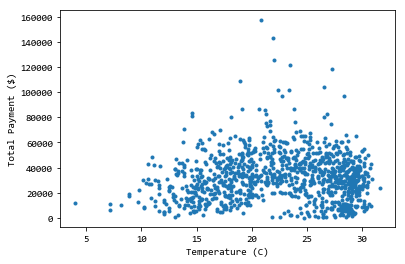

In [13]:
plt.plot(Temperature, group.Payment, '.')
plt.xlabel('Temperature (C)')
plt.ylabel('Total Payment ($)')

### Total Payment v.s. Precipitation
* 沒有下雨時比較多人買東西

Text(0,0.5,'Total Payment ($)')

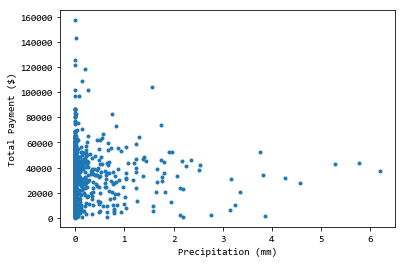

In [14]:
plt.plot(Precipitation, group.Payment, '.')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Total Payment ($)')

###  Precipitation v.s. Temperature
* 新竹的平均溫差滿大的
* 新竹不怎麼下雨

Text(0,0.5,'Precipitation (mm)')

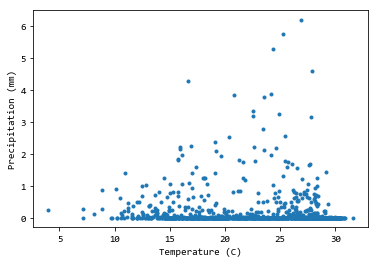

In [15]:
plt.plot(Temperature, Precipitation, '.')
plt.xlabel('Temperature (C)')
plt.ylabel('Precipitation (mm)')